In [44]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from tqdm import tqdm

In [58]:
class DBSCAN():
    def __init__(self, eps, minPts, points):
        self.eps = eps
        self.minPts = minPts
        self.points = points

        self.C = 0
        self.clusters = {i:None for i in range(points.shape[0])}
        self.visited = {i:False for i in range(points.shape[0])}
        self.noise = {i:False for i in range(points.shape[0])}
        self.scan()
        
    def getNeighs(self, P):
        return np.where(np.linalg.norm(self.points - self.points[P,:], axis = 1) <= self.eps)[0]
    
    def expansion(self, point):
        N = self.getNeighs(point)

        while N.shape[0] != 0:
            P = N[0]
            
            if not self.visited[P]:
                self.visited[P] = True
                N_ = self.getNeighs(P)

                if N_.shape[0] >= self.minPts:
                    N = np.concatenate((N[1:], N_), axis=0)
            else:
                N = N[1:]

            if not self.clusters[P]:
                self.clusters[P] = self.C

    def scan(self):
        for P in tqdm(range(self.points.shape[0])):
            if not self.visited[P]:
                self.visited[P] = True
                N = self.getNeighs(P)

                if N.shape[0] <= self.minPts:
                    self.noise[P] = True

                else:
                    self.C += 1
                    self.expansion(P)       

In [19]:
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

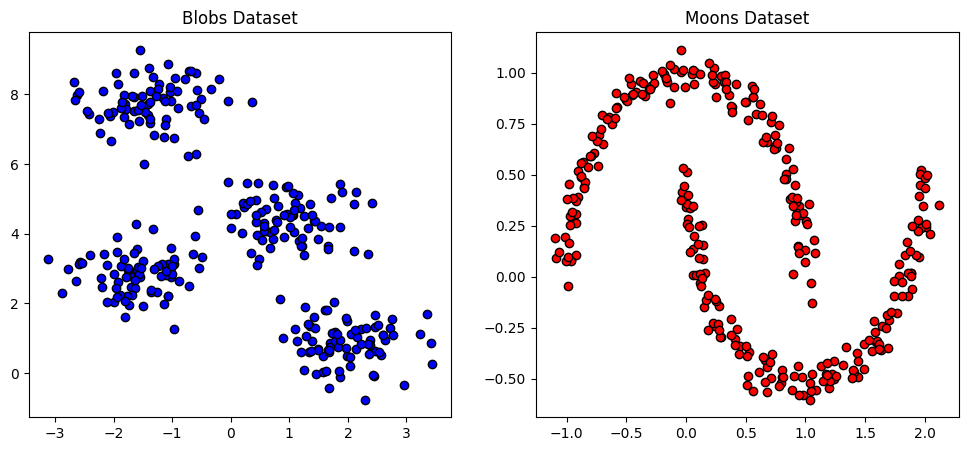

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c='blue', marker='o', edgecolor='k')
ax[0].set_title('Blobs Dataset')

ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c='red', marker='o', edgecolor='k')
ax[1].set_title('Moons Dataset')

plt.show()

In [103]:
blobs_scan = DBSCAN(0.6, 2, X_blobs)
moons_scan = DBSCAN(0.2, 3, X_moons)

100%|██████████| 300/300 [00:00<00:00, 33326.04it/s]


In [92]:
def plotClusters(ax, X, clusters):
    Cs = set(clusters.values())
    colors = {cluster:np.random.rand(3,) for cluster in Cs}

    for cluster in Cs:
        points = [i for i in clusters if clusters[i] == cluster]
        ax.scatter(X[points, 0], 
                   X[points, 1], 
                   label=f'Cluster {cluster}', 
                   color=colors[cluster])
    ax.legend()

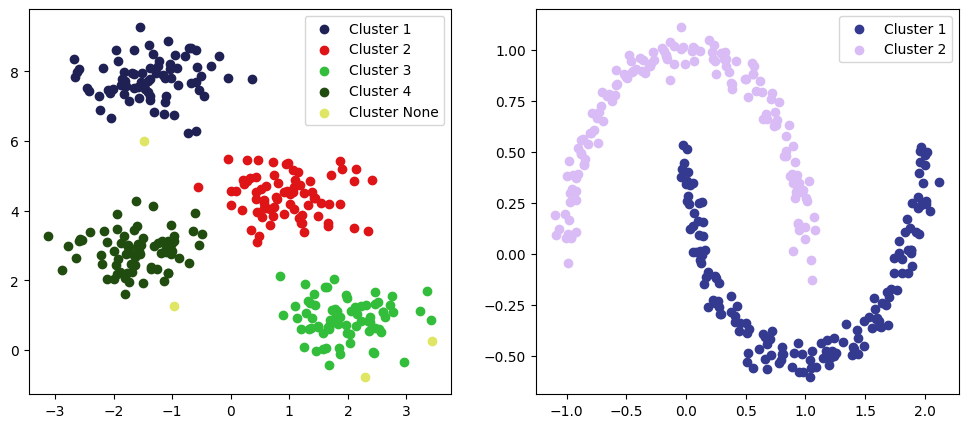

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plotClusters(ax[0], X_blobs, blobs_scan.clusters)
plotClusters(ax[1], X_moons, moons_scan.clusters)